In [21]:
import numpy as np
import pandas as pd
from scipy import stats

songs=pd.read_csv('data/tracks.csv')
songs=songs.head(10000)

In [22]:
songs_for_k_means = songs.copy()
songs_for_k_means.set_index('id',inplace=True)

In [23]:
def drop_columns(dataframe,to_be_deleted):
    dataframe.drop(to_be_deleted, axis=1, inplace=True)
to_be_deleted = ['id_artists', 'artists','name','release_date'] 

In [24]:
songs_for_k_means['release_date'] = pd.to_datetime(songs_for_k_means['release_date'], errors='coerce')

In [25]:
songs_for_k_means['year'] = pd.DatetimeIndex(songs_for_k_means['release_date']).year
songs_for_k_means['month'] = pd.DatetimeIndex(songs_for_k_means['release_date']).month

In [26]:
import sklearn
from sklearn import preprocessing

def scaler(dataframe,to_be_scaled):
    scaler = sklearn.preprocessing.StandardScaler(copy = True)
    dataframe[to_be_scaled] = scaler.fit_transform(dataframe[to_be_scaled].to_numpy())
# to_be_scaled = ['popularity','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']
to_be_scaled = ['loudness','duration_ms','tempo']

In [27]:
drop_columns(songs_for_k_means,to_be_deleted)#delete columns
songs_for_k_means["key"] = songs_for_k_means["key"].astype("category")
songs_for_k_means = pd.get_dummies(songs_for_k_means, columns=["key"])

In [28]:
# scaler(songs_for_k_means,to_be_scaled)

In [29]:
songs_for_k_means.dropna(inplace=True)

In [30]:
x = songs_for_k_means['valence']
del songs_for_k_means["valence"]
songs_for_k_means['valence'] = x

# AND SO IT BEGINS

In [31]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(songs_for_k_means, test_size = 0.3)

x_train = train.drop('valence', axis=1)
y_train = train['valence']

x_test = test.drop('valence', axis = 1)
y_test = test['valence']

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [33]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = (mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.040560985430033336
RMSE value for k=  2 is: 0.03295524746503333
RMSE value for k=  3 is: 0.030157680262255557
RMSE value for k=  4 is: 0.029114519007116663
RMSE value for k=  5 is: 0.0288026445531
RMSE value for k=  6 is: 0.02885401249336667
RMSE value for k=  7 is: 0.029001170172958505
RMSE value for k=  8 is: 0.02904188234248125
RMSE value for k=  9 is: 0.028952132064148563
RMSE value for k=  10 is: 0.029080334398766665
RMSE value for k=  11 is: 0.029086562201934157
RMSE value for k=  12 is: 0.02923557231447778
RMSE value for k=  13 is: 0.02926231607247909
RMSE value for k=  14 is: 0.029362843200390478
RMSE value for k=  15 is: 0.02959787403458148
RMSE value for k=  16 is: 0.02986723331860104
RMSE value for k=  17 is: 0.030191762837276703
RMSE value for k=  18 is: 0.030431561514992184
RMSE value for k=  19 is: 0.030563778986293727
RMSE value for k=  20 is: 0.030875642142041665


<AxesSubplot:>

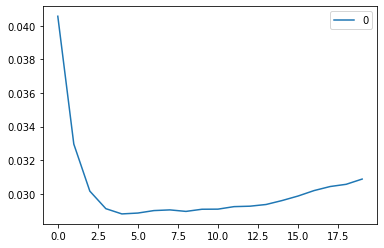

In [35]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [36]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 6}

In [37]:
model.best_estimator_

KNeighborsRegressor(n_neighbors=6)